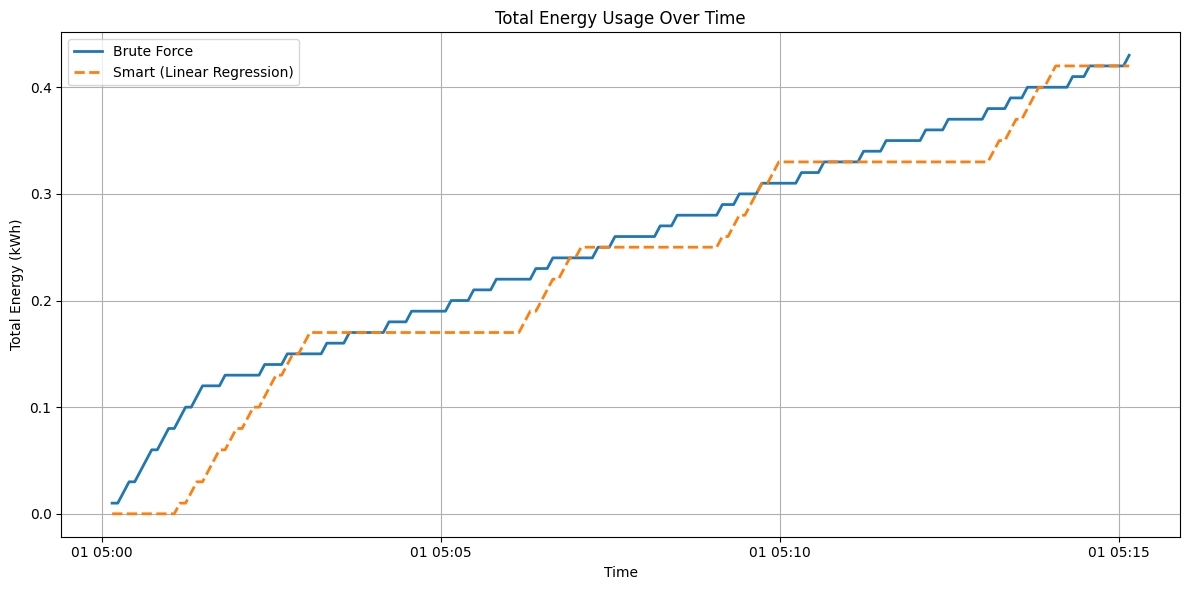

✅ Total energy plot saved to: /Users/diya/SmartRoom/room1_output_logs/total_energy_comparison.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load data
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"
#boosting_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_boosting.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)
#boost_df = pd.read_csv(boosting_csv)

# Convert 'time' to datetime
brute_df['time'] = pd.to_datetime(brute_df['time'])
smart_df['time'] = pd.to_datetime(smart_df['time'])
#boost_df['time'] = pd.to_datetime(boost_df['time'])

# Plot total energy usage
plt.figure(figsize=(12, 6))
plt.plot(brute_df['time'], brute_df['total_energy'], label='Brute Force', linewidth=2)
plt.plot(smart_df['time'], smart_df['total_energy'], label='Smart (Linear Regression)', linewidth=2, linestyle='--')
#plt.plot(boost_df['time'], boost_df['total_energy'], label='Boosting (Linear Regression)', linewidth=3, linestyle='--')

plt.title("Total Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
plot_path = os.path.join(os.path.dirname(brute_csv), "total_energy_comparison.png")
plt.savefig(plot_path)
plt.show()
print(f"✅ Total energy plot saved to: {plot_path}")


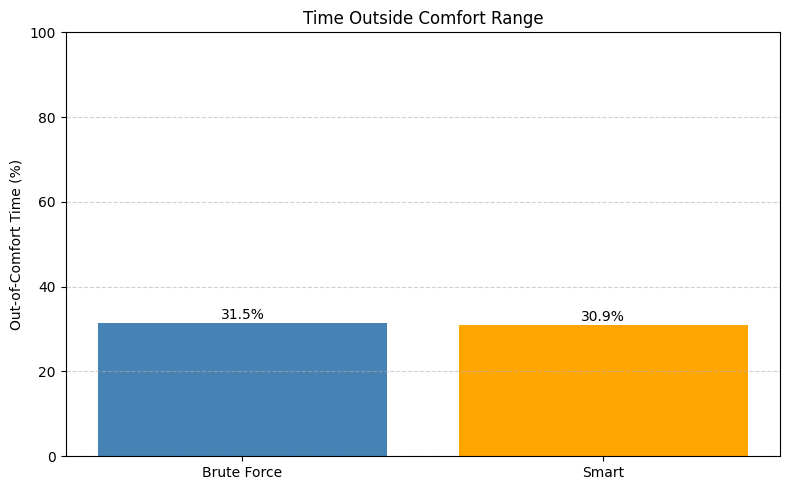

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"

# ✅ Correct way to load the CSVs
brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Convert room_temp to numeric
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")
smart_df["room_temp"] = pd.to_numeric(smart_df["room_temp"], errors="coerce")

# Define comfort range
low, high = 20.0, 22.0

# Count out-of-range steps
def count_out_of_range(df):
    return ((df["room_temp"] < low) | (df["room_temp"] > high)).sum()

brute_violations = count_out_of_range(brute_df)
smart_violations = count_out_of_range(smart_df)

# Total steps
brute_total = brute_df["room_temp"].notna().sum()
smart_total = smart_df["room_temp"].notna().sum()

# Percent
brute_percent = 100 * brute_violations / brute_total
smart_percent = 100 * smart_violations / smart_total

# Plot
methods = ["Brute Force", "Smart"]
values = [brute_percent, smart_percent]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=["steelblue", "orange"])
plt.ylabel("Out-of-Comfort Time (%)")
plt.title("Time Outside Comfort Range")
plt.ylim(0, 100)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


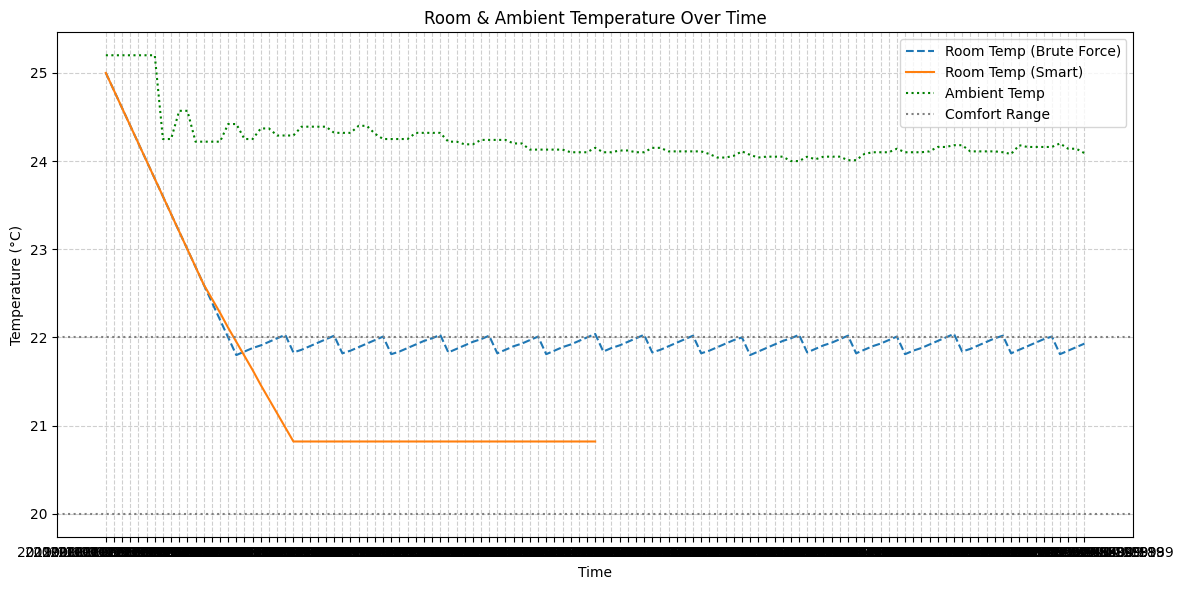

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Ensure numeric types
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")
smart_df["room_temp"] = pd.to_numeric(smart_df["room_temp"], errors="coerce")
brute_df["ambient_temp"] = pd.to_numeric(brute_df["ambient_temp"], errors="coerce")

# Define comfort range
low, high = 20.0, 22.0

# Plot
plt.figure(figsize=(12, 6))

# Room temperature lines
plt.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp (Brute Force)", linestyle='--')
plt.plot(smart_df["time"], smart_df["room_temp"], label="Room Temp (Smart)", linestyle='-')

# Ambient temperature
plt.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

# Comfort range lines
plt.axhline(low, color='gray', linestyle=':', label='Comfort Range')
plt.axhline(high, color='gray', linestyle=':')

# Labels and layout
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Room & Ambient Temperature Over Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


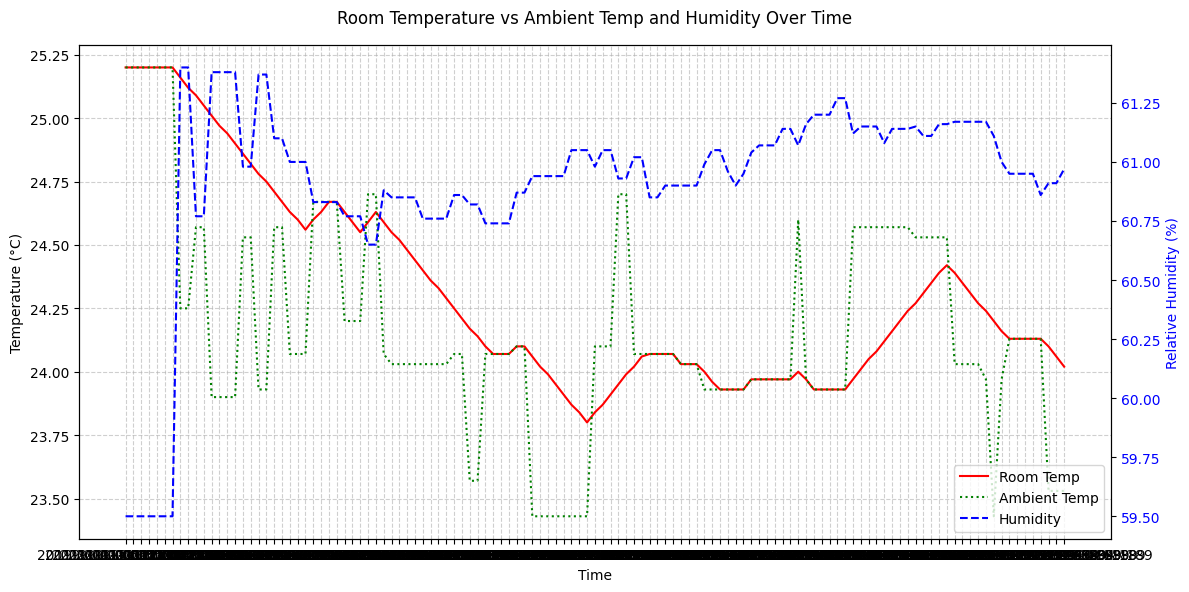

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room2_output_logs/output_csv_passive.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


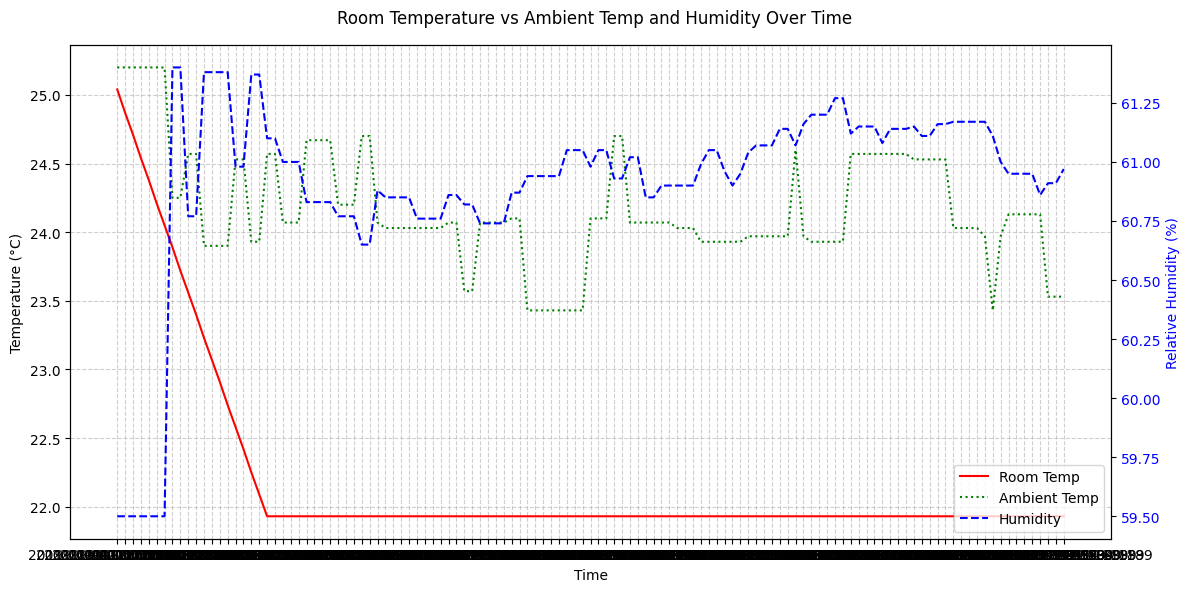

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room2_output_logs/output_csv_brute.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


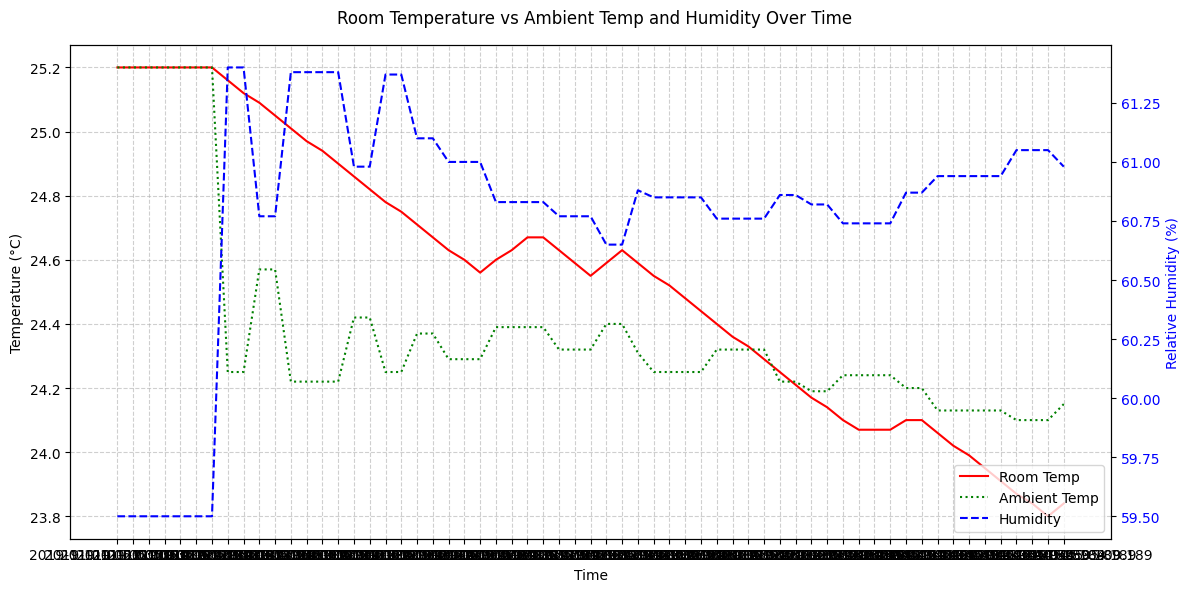

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Baseline temperature of the room 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

base_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
base_df = pd.read_csv(base_csv)
brute_df = pd.read_csv(brute_csv)

# Parse timestamp (already in readable format)
base_df["time"] = pd.to_datetime(base_df["time"])
brute_df["time"] = pd.to_datetime(brute_df["time"])
base_df["room_temp"] = pd.to_numeric(base_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot room and ambient temps
ax1.plot(brute_df["time"], base_df["room_temp"], label="Room Temp(base)", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp(brute)", linestyle='-', color="orange")
ax1.plot(brute_df["time"], base_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format x-axis as minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # show minute part of timestamp
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
ax2.plot(base_df["time"], base_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legends and grid
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x123a397f0>.

Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).


Error in callback <function _draw_all_if_interactive at 0x1224015e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ...

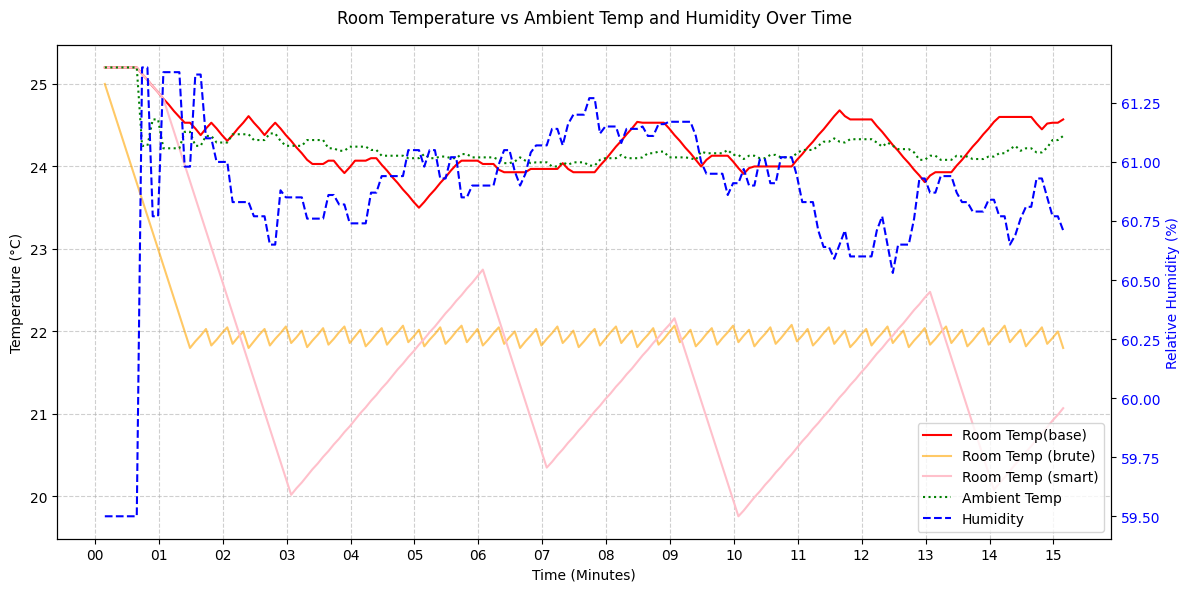

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

base_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"

base_df = pd.read_csv(base_csv)
brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Parse timestamp (already in readable format)
base_df["time"] = pd.to_datetime(base_df["time"])
brute_df["time"] = pd.to_datetime(brute_df["time"])
smart_df["time"] = pd.to_datetime(smart_df["time"])
base_df["room_temp"] = pd.to_numeric(base_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot room and ambient temps
ax1.plot(brute_df["time"], base_df["room_temp"], label="Room Temp(base)", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp (brute)", linestyle='-', color="orange", alpha=0.6)
ax1.plot(brute_df["time"], smart_df["room_temp"], label="Room Temp (smart)", linestyle='-', color="pink")
ax1.plot(brute_df["time"], base_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format x-axis as minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # show minute part of timestamp
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
ax2.plot(base_df["time"], base_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legends and grid
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
